In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams

rc('font', **{'family':'sans-serif','sans-serif':['Computer Modern']})
rc('text', usetex=True)

In [2]:
mproton = 0.938272046
higgs_vev = 246.2
pbGeVfactor = 2.67e-9

def convert_to_sig(x, mass):
    reduced_mass = (mass*mproton)/(mass+mproton)
    numerator = (x*reduced_mass)**2
    denom = 1e36*np.pi*pbGeVfactor*np.pi*higgs_vev**4
    return numerator/denom


In [3]:
def data_cut(data):
    numstart=0
    
    for i in range(len(data[:,0])):
        if (data[i,1])>0.0:
            numstart = i
            break
            
            

    return data[numstart:-1]

In [4]:
from scipy.interpolate import interp1d

def envelope(data1, data2,x):
    func1 = interp1d(data1[:,0], data1[:,1])
    func2 = interp1d(data2[:,0], data2[:,1])
    data_ret = []
    for i in range(len(x)):
        try:
            data_ret.append(min(func1(x[i]), func2(x[i])))
        except:
            try:
                data_ret.append(func1(x[i]))
            except:
                try:
                    data_ret.append(func2(x[i]))
                except:
                    print "out of bounds for a all", x[i]
    return data_ret, x

In [14]:
SHM_CDMS= np.genfromtxt('Halo_integrals/SHM/SuperCDMS/SHM_exclusion.dat', delimiter=' ')
SHM_iZIP= np.genfromtxt('Halo_integrals/SHM/SuperCDMS/iZIP_exclusion_3keV.dat', delimiter=' ')
mdm_space = np.logspace(np.log10(SHM_CDMS[0,0]), 3.01,1000)
SHM_env= envelope(SHM_CDMS, SHM_iZIP, mdm_space)
A5_env =[]
A9_env = []
A22_env = []
A24_env = []
A_env = [A5_env, A9_env, A22_env, A24_env]
k = 0
for j in ['5', '9', '22', '24']:
    print k
    for i in ['mean', 'lower', 'upper']:
        path_iZIP = '../Halo_integrals/etaA'+j+'DM/SuperCDMS_iZIP/'+i+'_exclusion.dat'
        temp_iZIP = np.genfromtxt(path_iZIP, delimiter=' ')
        path_CDMS = '../Halo_integrals/etaA'+j+'DM/SuperCDMS_SNOLAB/'+i+'_exclusion.dat'
        temp_CDMS = np.genfromtxt(path_CDMS, delimiter=' ')
        mdm_space = np.logspace(np.log10(temp_CDMS[0,0]), 3.01,1000)
        temp_env = envelope(temp_CDMS, temp_iZIP, mdm_space)
        A_env[k].append(temp_env)
    k+=1

0
1
2
3


In [15]:
SHM_Xe =np.genfromtxt('Halo_integrals/SHM/LZ/exclusion_line2.dat', delimiter=' ')
SHM_Xe = data_cut(SHM_Xe)
A5_Xe1T =[]
A9_Xe1T = []
A22_Xe1T = []
A24_Xe1T = []
AXe_1T = [A5_Xe1T, A9_Xe1T, A22_Xe1T, A24_Xe1T]
k = 0
for j in ['5', '9', '22', '24']:
    print k
    for i in ['mean', 'lower', 'upper']:
        path = '../Halo_integrals/etaA'+j+'DM/LZ/'+i+'_exclusion.dat'
        temp_data=np.genfromtxt(path, delimiter=' ')
        AXe_1T[k].append(data_cut(temp_data))
    k+=1

0
1
2
3


0
1
0
1


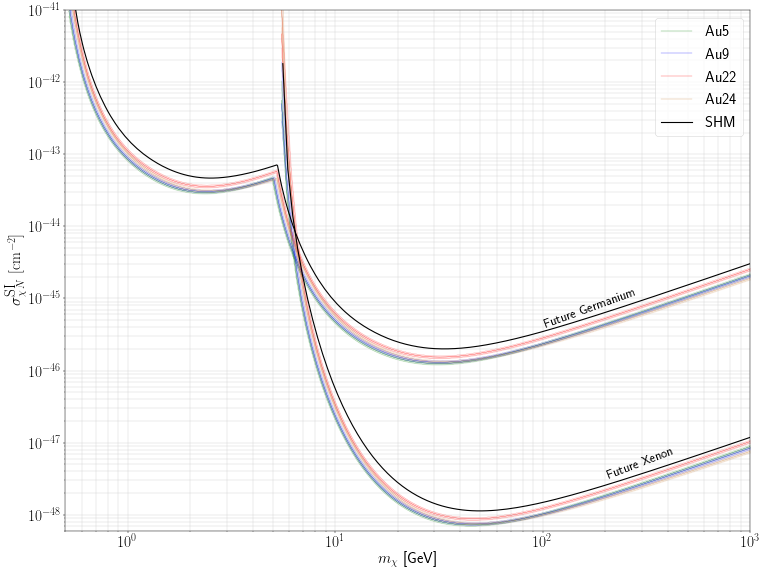

In [16]:

from matplotlib.pyplot import figure

figure(num=None, figsize=(19.2, 14.4), dpi=40, facecolor='w', edgecolor='k')
k=0
j=0
labels = [r'Au5', r'Au9', r'Au22', r'Au24']
colors = ['green', 'blue', 'red', 'peru']
for i in range(len(AXe_1T)):
    print k%2
    plt.loglog(A_env[k][0][1],convert_to_sig(A_env[k][0][0], A_env[k][0][1]), 
                        color=colors[k],lw=0.5, label=labels[k])
    plt.loglog(A_env[k][1][1],convert_to_sig(A_env[k][1][0], A_env[k][1][1]), 
                        color=colors[k],lw=0.2)
    plt.loglog(A_env[k][2][1],convert_to_sig(A_env[k][2][0], A_env[k][2][1]), 
                        color=colors[k],lw=0.2)
    plt.fill_between(A_env[k][1][1],convert_to_sig(A_env[k][1][0],A_env[k][1][1]),
                              convert_to_sig(A_env[k][2][0],A_env[k][2][1]) , 
                              color=colors[k], alpha=0.11, edgecolor=colors[k])
    
    
    plt.loglog(AXe_1T[k][0][:,0],convert_to_sig(AXe_1T[k][0][:,1], AXe_1T[k][0][:,0]), 
                        color=colors[k],lw=0.5)
    plt.loglog(AXe_1T[k][1][:,0],convert_to_sig(AXe_1T[k][1][:,1], AXe_1T[k][1][:,0]), 
                        color=colors[k],lw=0.2)
    plt.loglog(AXe_1T[k][2][:,0],convert_to_sig(AXe_1T[k][2][:,1], AXe_1T[k][2][:,0]), 
                        color=colors[k],lw=0.2)
    plt.fill_between(AXe_1T[k][1][:,0],convert_to_sig(AXe_1T[k][1][:,1],AXe_1T[k][1][:,0]),
                              convert_to_sig(AXe_1T[k][2][:,1],AXe_1T[k][2][:,0]) , 
                              color=colors[k], alpha=0.11, edgecolor=colors[k])

    
    #axarr[k%2,j].text(3e2, 1e-44,labels[k])
    k+=1
    if k > 1 and j==0:
        j += 1
        
plt.loglog(SHM_env[1], convert_to_sig(SHM_env[0], SHM_env[1]), 
           lw=2, color='black', label=r'SHM')
plt.loglog(SHM_Xe[:,0], convert_to_sig(SHM_Xe[:,1], SHM_Xe[:,0]), 
           lw=2, color='black')
plt.ylim(ymax=1e-41,ymin=6e-49)
plt.xlim(xmin=0.5, xmax=1e3)
plt.ylabel(r'$\sigma^{\textrm{SI}}_{\chi\,N}\,\,[\textrm{cm}^{-2}]$', size=28)
plt.xlabel(r'$m_{\chi}$ [GeV]', size=28)
plt.legend(fontsize=28)
plt.xticks([1,10,1e2,1e3], size=28)
plt.yticks([1e-48,1e-47,1e-46,1e-45, 1e-44, 1e-43, 1e-42, 1e-41], size=28)

plt.text(1e2,1.1e-45, r'Future Germanium', rotation=20, fontsize=24)
plt.text(2e2,7.0e-48, r'Future Xenon', rotation=21, fontsize=24)
plt.tight_layout()
plt.grid(which='both', color='lightgray')
#plt.savefig('sigma_allenv_in1.pdf', dpi=400)